In [1]:
import pickle

# Specify the path to your .pkl file
pkl_file_path = 'datasets\ServerMachineDataset\processed\machine-1-1_test.pkl'

# Open and read the .pkl file
with open(pkl_file_path, 'rb') as file:
    loaded_data = pickle.load(file)

In [2]:
import pandas as pd
pd.DataFrame(loaded_data)



,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.075269,0.065678,0.070234,0.074332,0.0,0.933333,0.274011,0.0,0.031081,0.000000,...,0.0,0.008596,0.068036,0.048893,0.000386,0.000034,0.064432,0.064500,0.0,0.0
1,0.086022,0.080508,0.075808,0.076655,0.0,0.930769,0.274953,0.0,0.031081,0.000122,...,0.0,0.008596,0.070020,0.050437,0.000386,0.000022,0.065228,0.065224,0.0,0.0
2,0.075269,0.064619,0.071349,0.074332,0.0,0.928205,0.274953,0.0,0.030940,0.000366,...,0.0,0.008596,0.069684,0.055069,0.000386,0.000045,0.067111,0.067178,0.0,0.0
3,0.086022,0.048729,0.063545,0.070848,0.0,0.928205,0.273070,0.0,0.027250,0.000244,...,0.0,0.010029,0.073253,0.051467,0.000000,0.000034,0.066676,0.066744,0.0,0.0
4,0.086022,0.051907,0.062430,0.070848,0.0,0.933333,0.274011,0.0,0.030940,0.000244,...,0.0,0.008596,0.070932,0.051467,0.000386,0.000022,0.066604,0.066671,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28474,0.075269,0.051907,0.047938,0.047619,0.0,0.907692,0.257062,0.0,0.043571,0.000244,...,0.0,0.031519,0.046733,0.040144,0.000000,0.000022,0.042931,0.043000,0.0,0.0
28475,0.064516,0.025424,0.039019,0.044135,0.0,0.905128,0.257062,0.0,0.032501,0.000000,...,0.0,0.031519,0.047438,0.048893,0.000000,0.000056,0.046550,0.046619,0.0,0.0
28476,0.064516,0.080508,0.050167,0.047619,0.0,0.907692,0.258004,0.0,0.026114,0.000611,...,0.0,0.031519,0.046797,0.040144,0.000386,0.000045,0.043003,0.043000,0.0,0.0
28477,0.064516,0.056144,0.047938,0.046458,0.0,0.902564,0.257062,0.0,0.033210,0.000122,...,0.0,0.031519,0.041884,0.043232,0.000000,0.000045,0.039890,0.039959,0.0,0.0


In [4]:
swat = pd.read_csv('datasets\data\SWaT_Dataset_Attack_v0.csv')
swat.columns

Index([' Timestamp', 'FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201',
       'AIT202', 'AIT203', 'FIT201', ' MV201', ' P201', ' P202', 'P203',
       ' P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301',
       'MV302', ' MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402',
       'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501',
       'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504',
       'P501', 'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602',
       'P603', 'Normal/Attack'],
      dtype='object')

C:\Users\g.nenna\AppData\Local\Temp\ipykernel_3000\792792834.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


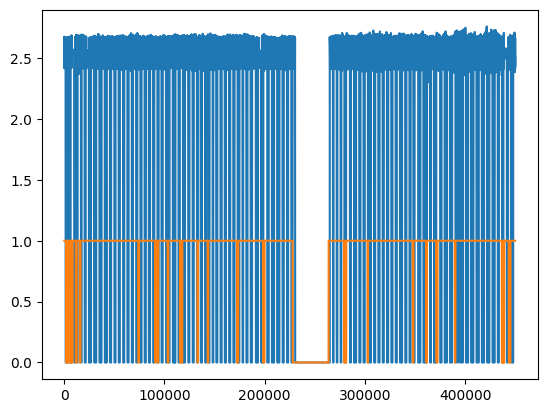

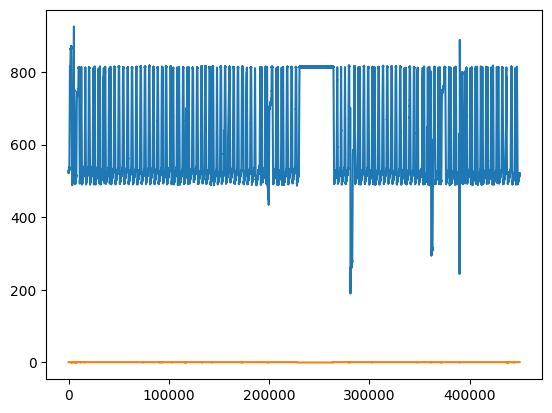

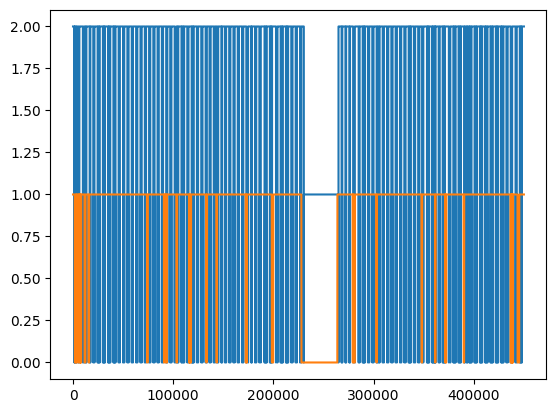

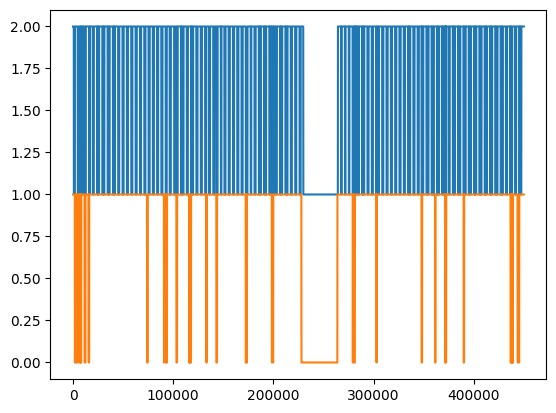

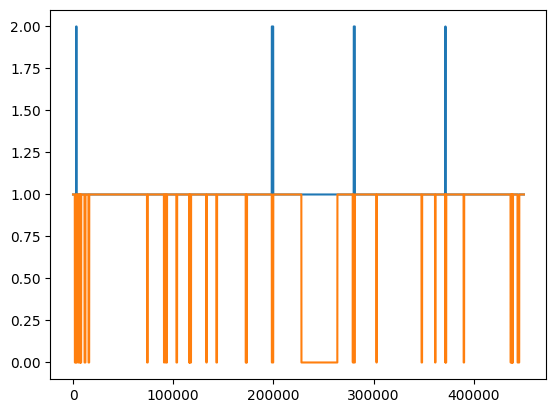

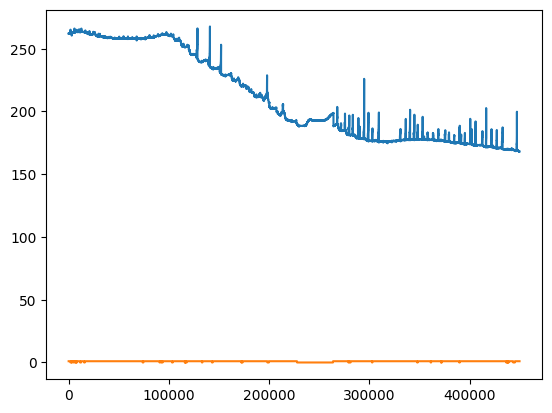

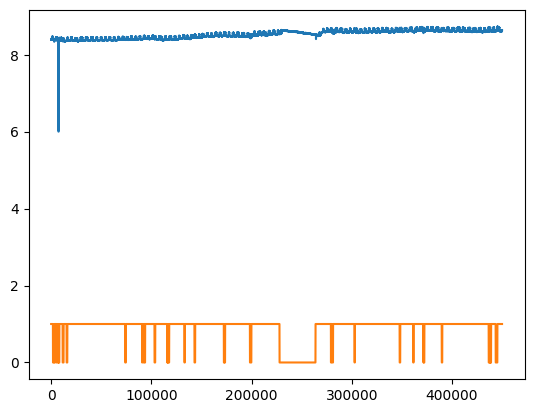

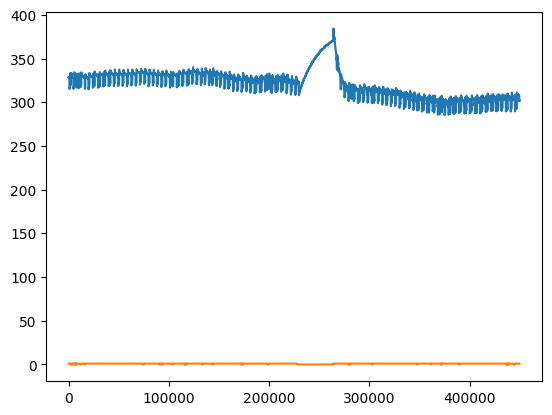

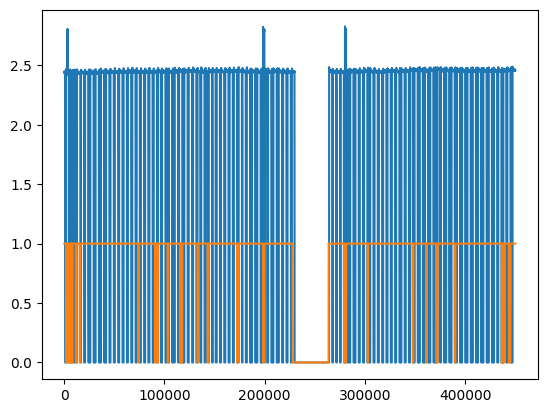

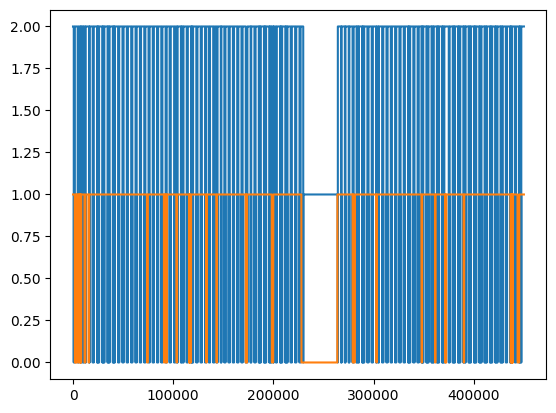

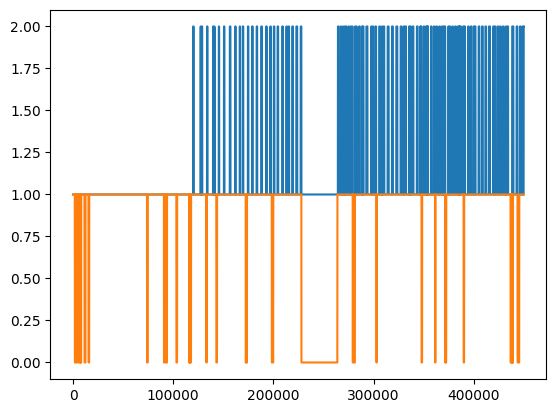

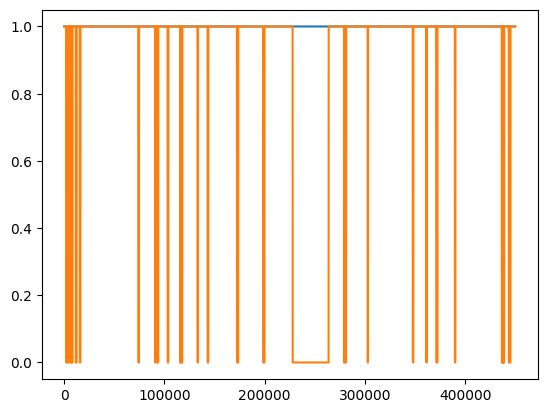

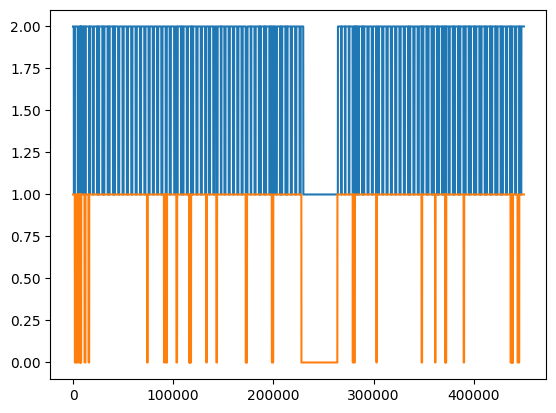

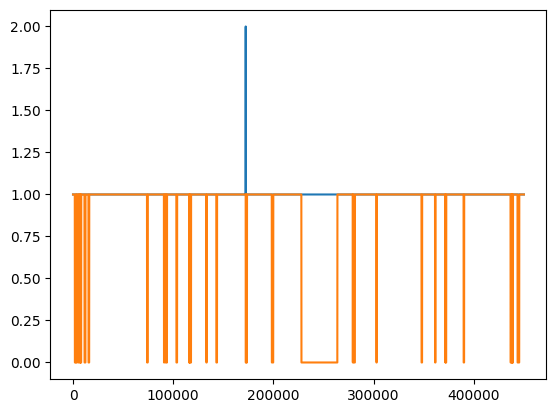

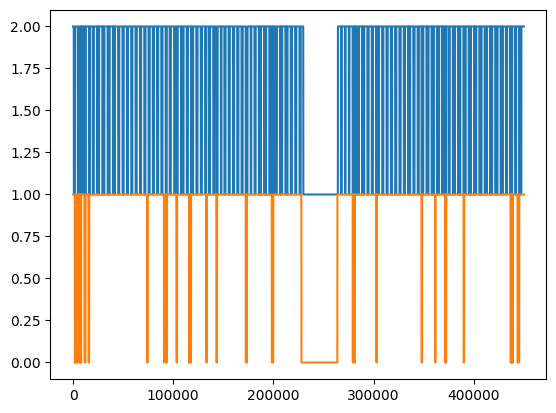

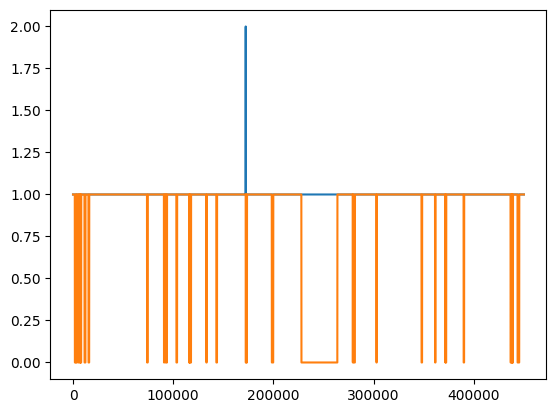

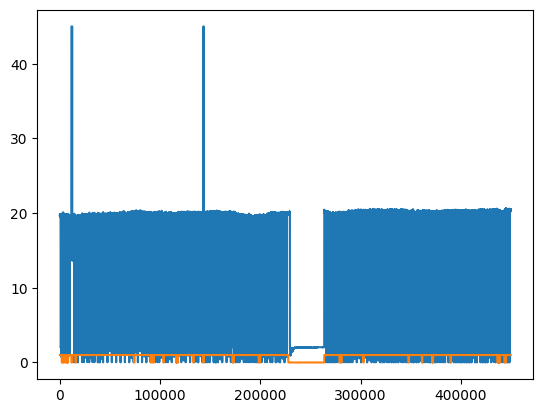

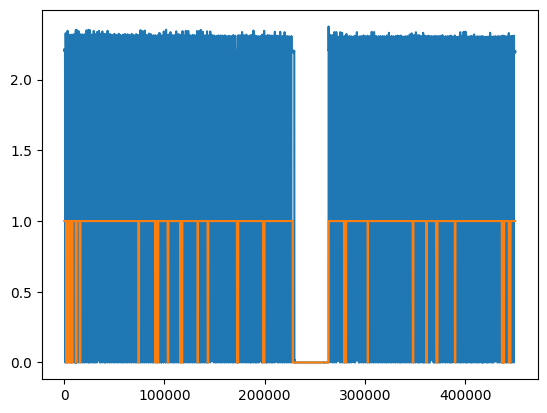

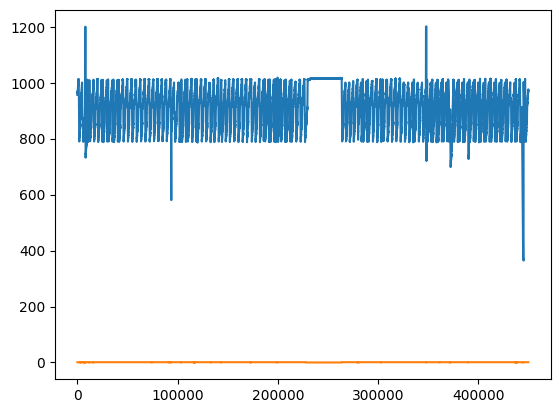

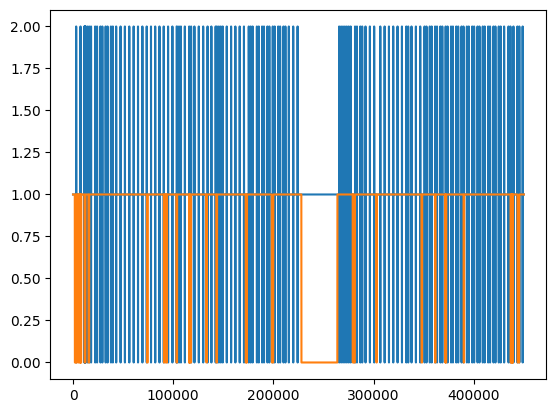

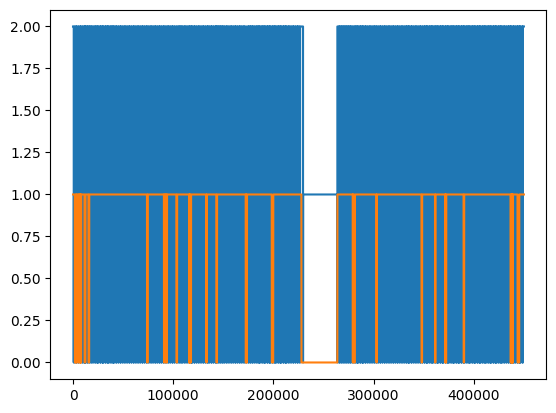

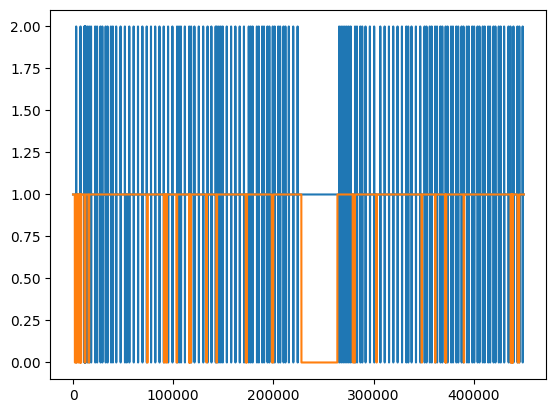

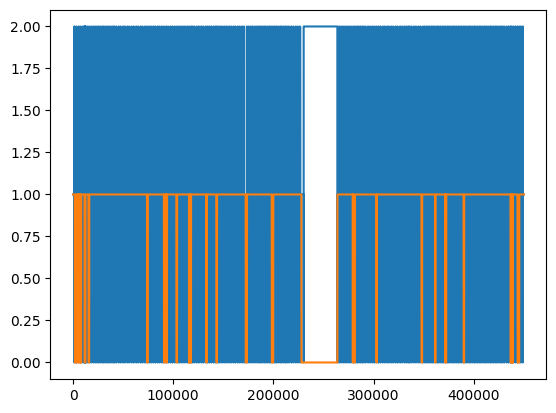

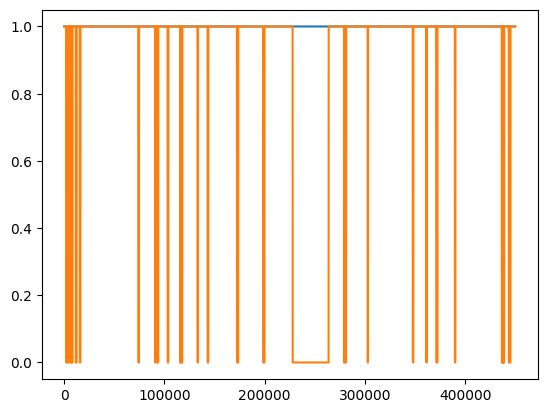

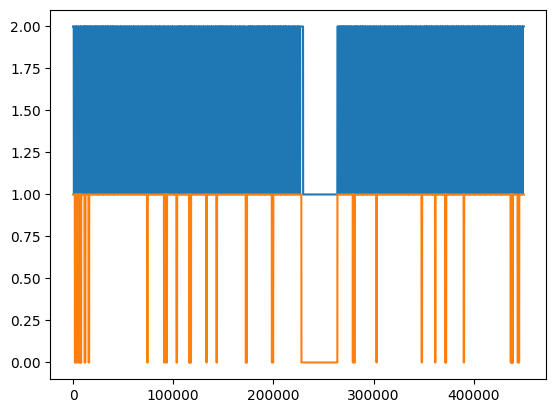

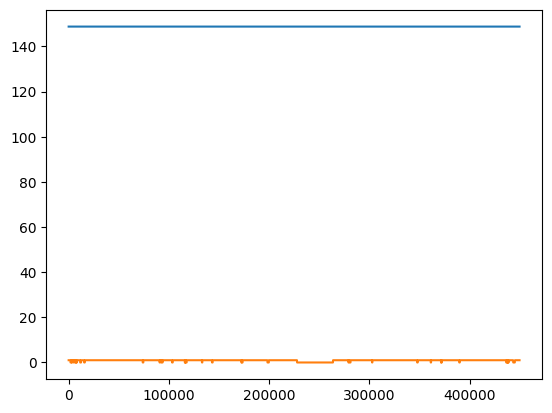

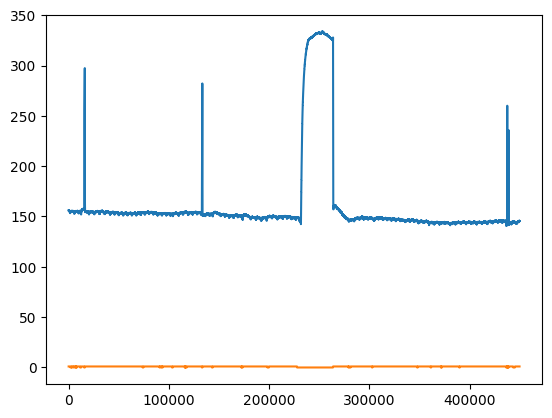

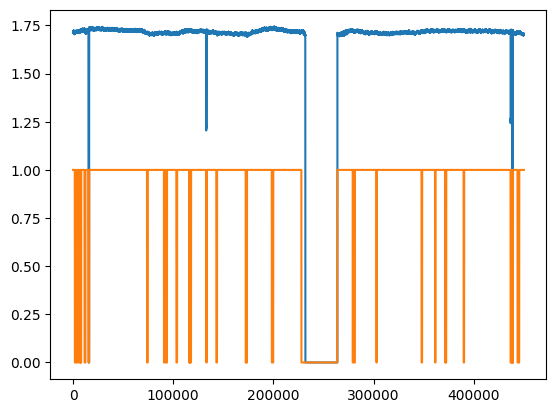

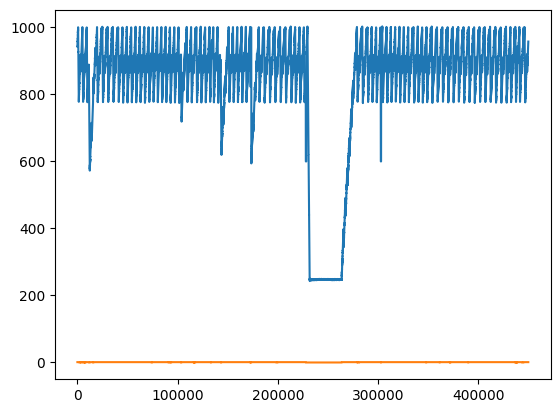

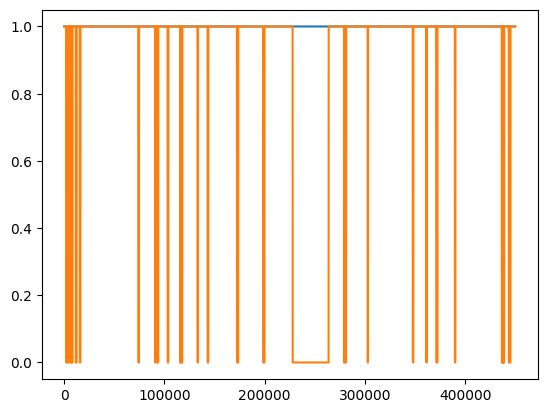

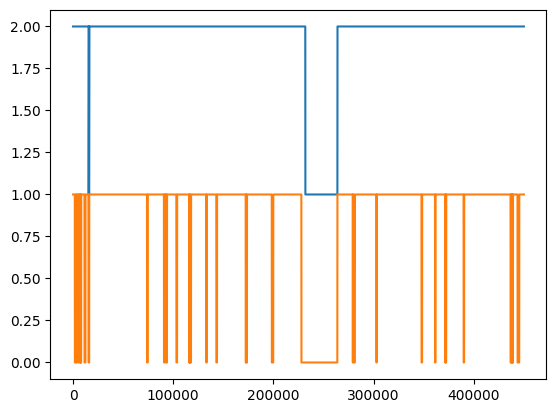

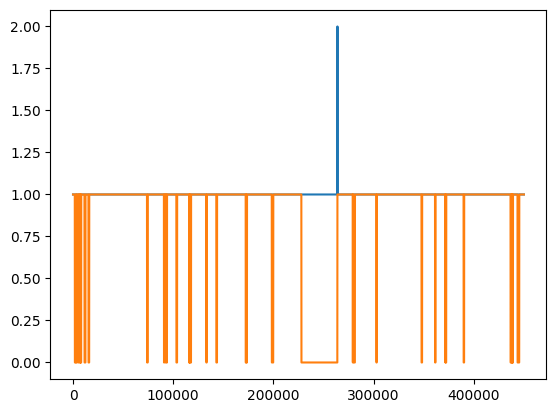

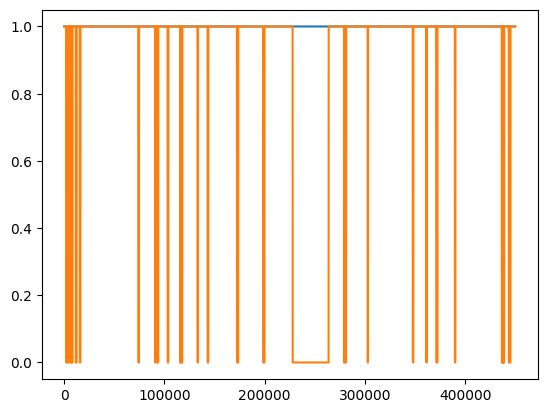

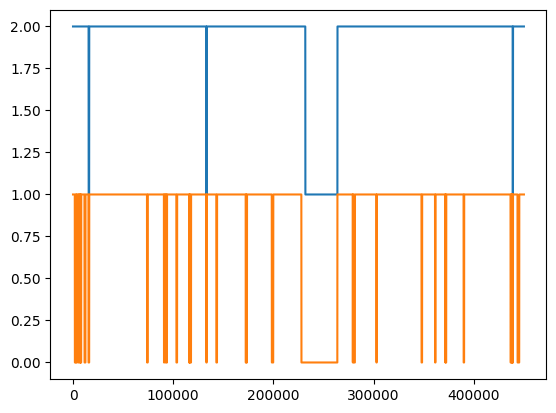

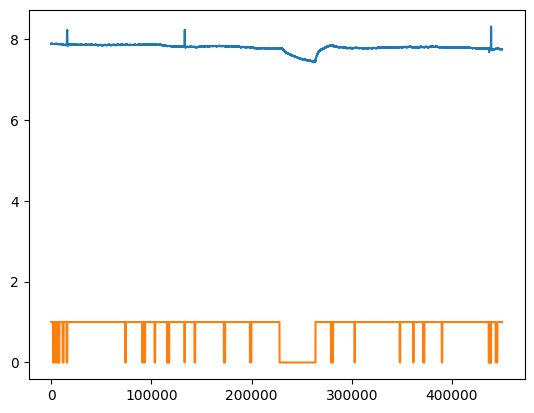

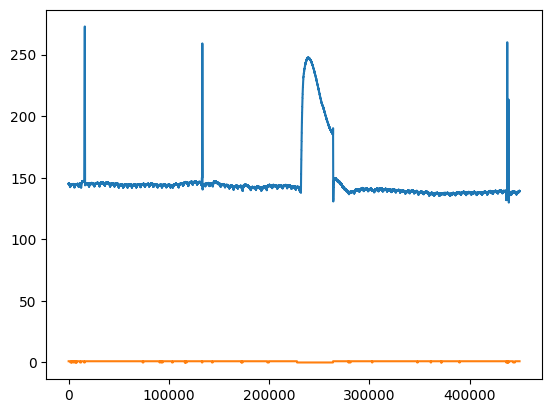

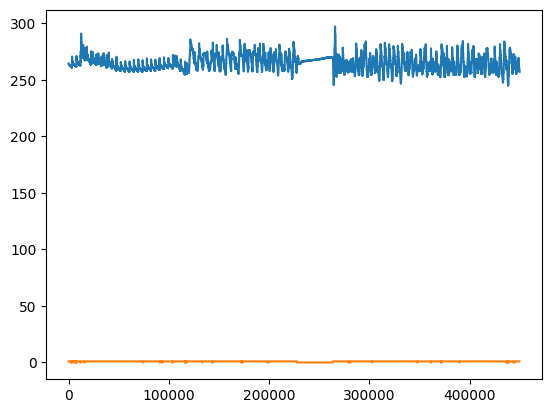

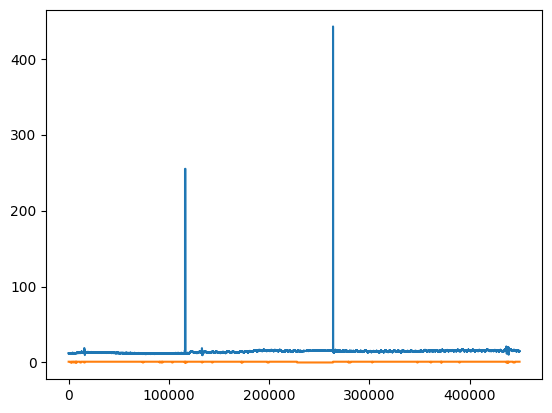

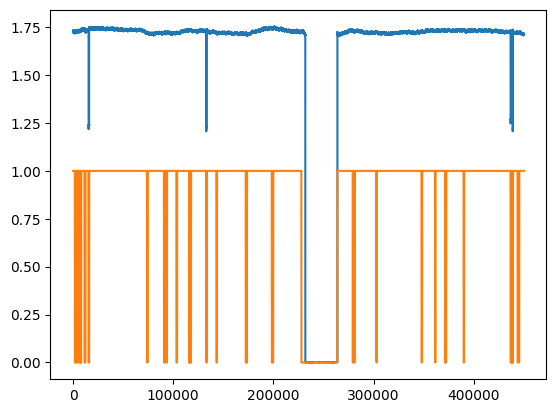

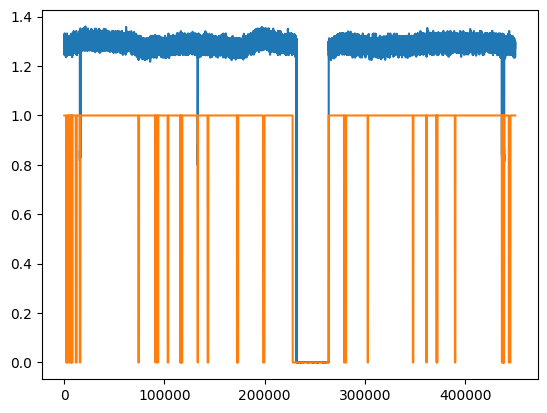

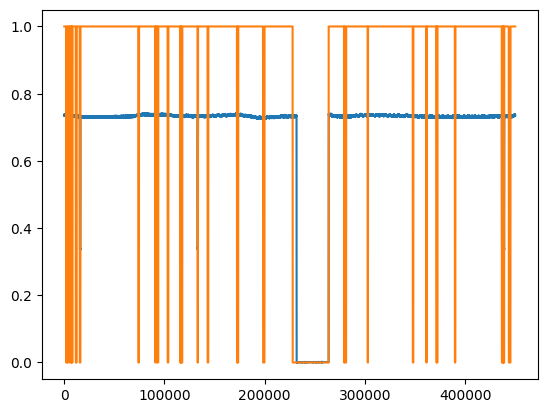

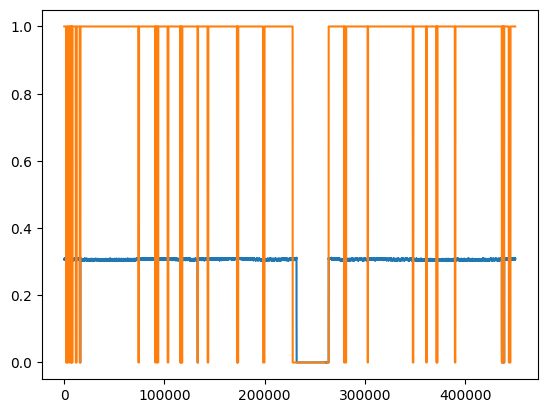

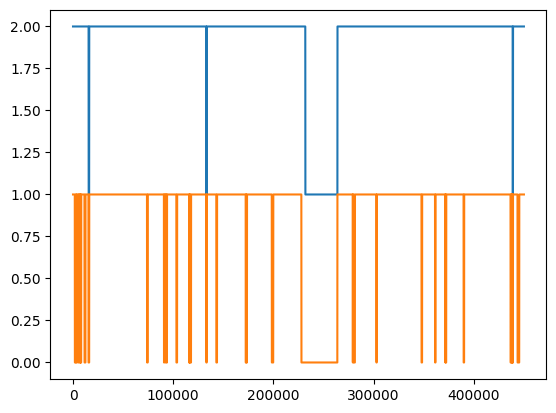

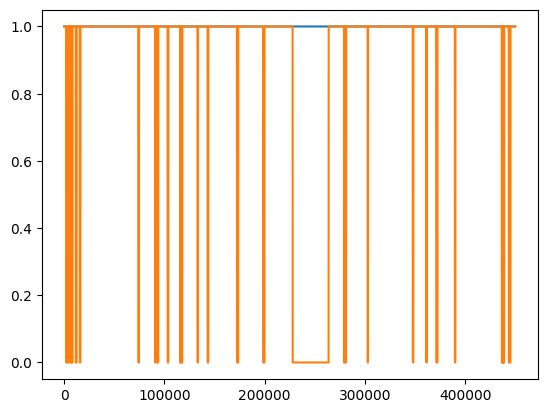

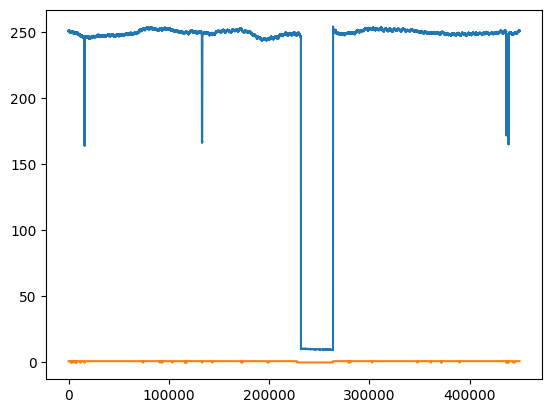

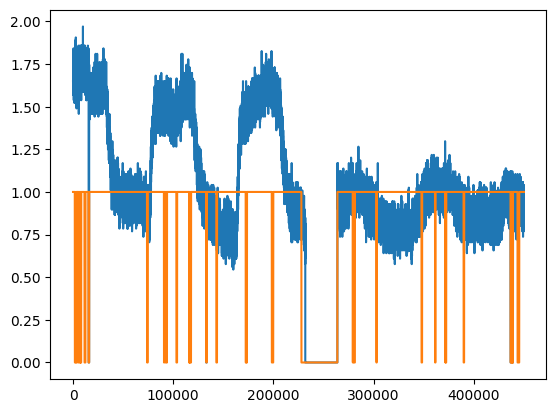

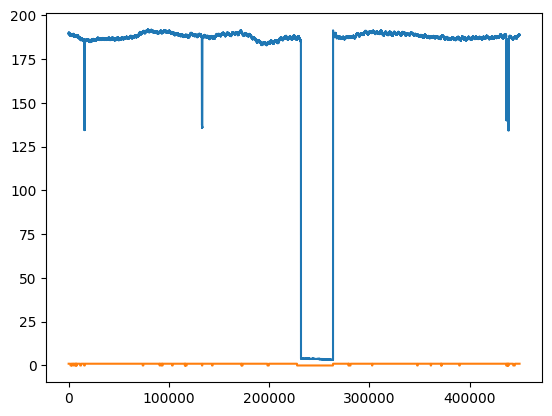

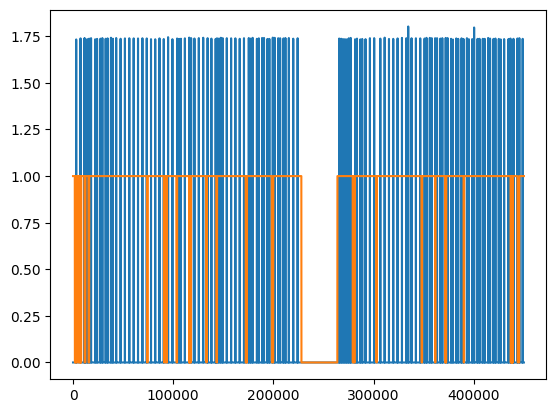

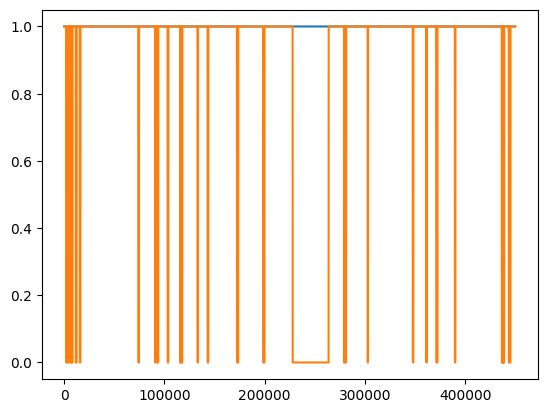

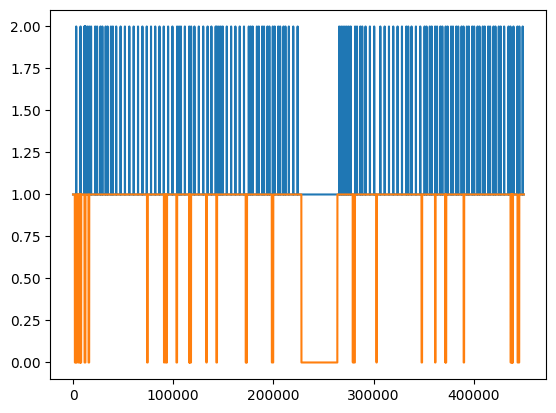

In [10]:

from matplotlib import pyplot as plt
for c in swat.columns[1:51]:
    fig = plt.figure()
    plt.plot(swat[c].values)
    plt.plot(swat['Normal/Attack']=='Normal')

In [29]:
swat = swat.drop(' Timestamp', axis=1)
labels = (swat['Normal/Attack'].values=='Attack')
values = swat.drop('Normal/Attack', axis=1).values

In [37]:
train_test_split=0.7

train_values = values[:int(train_test_split*len(labels)),:]
train_labels = labels[:int(train_test_split*len(labels))]

test_values = values[int(train_test_split*len(labels)):,:]
test_labels = labels[int(train_test_split*len(labels)):]

In [ ]:
import pickle

#dump train values into file
path = 'datasets/data/processed/SWAT_train.pkl'
with open(path, 'wb') as file:
    pickle.dump(train_values, file)



#dump test values into file
path = 'datasets/data/processed/SWAT_test.pkl'
with open(path, 'wb') as file:
    pickle.dump(test_values, file)


#dump test labels into file
path = 'datasets/data/processed/SWAT_test_label.pkl'
with open(path, 'wb') as file:
    pickle.dump(test_labels, file)